In [6]:
!pip install umap-learn

   ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
   --------------------------- ------------ 61.4/88.8 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 88.8/88.8 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import umap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from umap import UMAP 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, ConfusionMatrixDisplay

In [10]:
df = pd.read_csv("C:/Users/Mary/Desktop/Диплом/final_df.csv")

In [12]:
df = df.drop(df.columns[0], axis=1)

In [14]:
df.head(2)

,Quadrant,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
0,Q3,0.344369,0.267671,0.231999,0.226553,0.236617,0.256444,0.282879,0.309561,0.325702,...,-0.020307,2.324166,3.567792,3.883560,-1.823020,-2.058319,-5.530811,-2.079775,-2.063657,163.043478
1,Q2,0.413149,0.422476,0.382707,0.338075,0.339839,0.332445,0.323744,0.324923,0.316282,...,-1.688632,-3.825361,-0.613288,-3.535904,-4.854705,-1.428813,-8.155371,0.105861,-4.854570,135.999178


In [16]:
X = df.drop('Quadrant',axis=1)
y = df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Визуализация для 2-х компонент

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
umap = UMAP(n_components=2)  

In [97]:
X_umap = umap.fit_transform(X_scaled)

In [99]:
y = df['Quadrant']

In [103]:
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y)

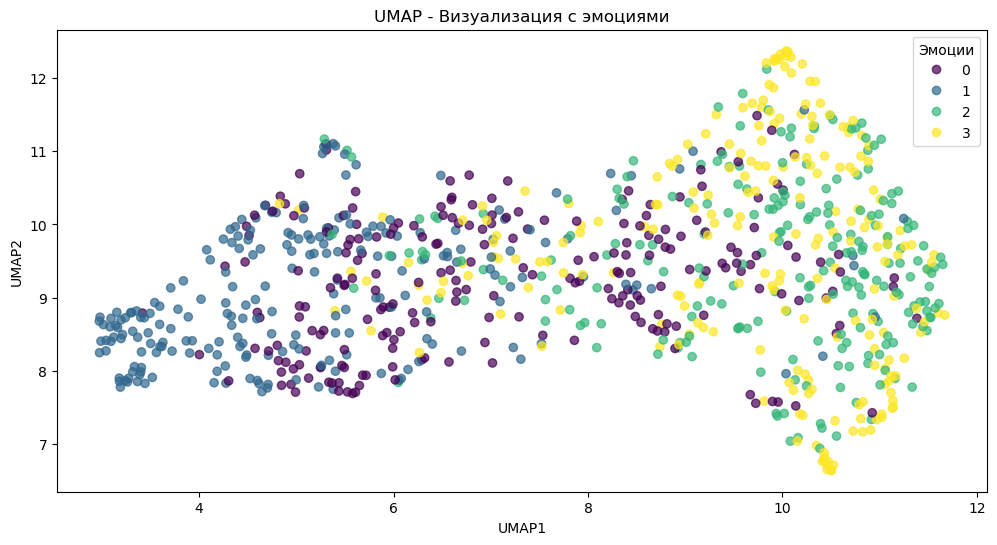

In [113]:
# Предположим, что у вас есть метки классов (например, эмоции)
labels = y_train_encoded

plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("UMAP - Визуализация с эмоциями")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(*scatter.legend_elements(), title="Эмоции")
plt.show()

# Визуализация для трех компонент

In [44]:
umap = UMAP(n_components=3)  

In [46]:
X_umap = umap.fit_transform(X_scaled)

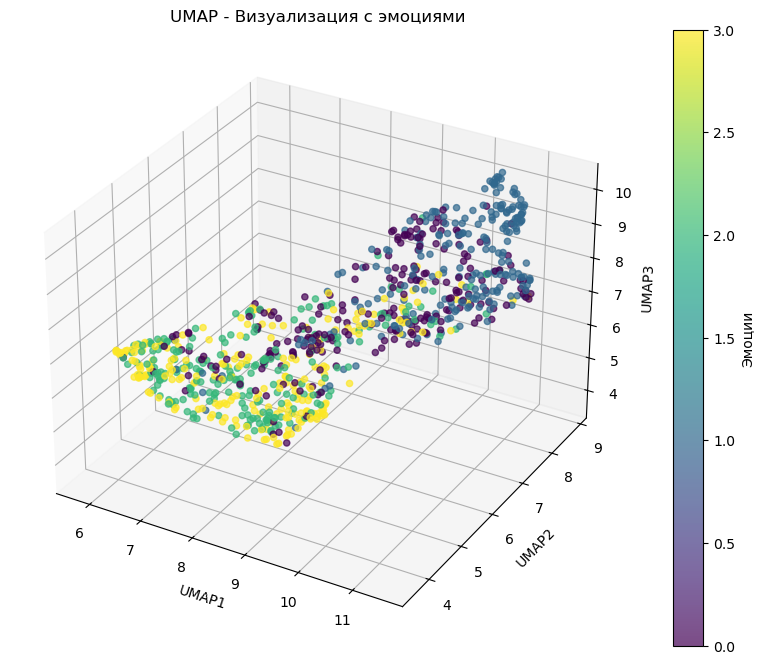

In [48]:
X_umap_3d = umap.transform(X_scaled)[:, :3] 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализируем данные в 3D, используя цветовую кодировку по меткам (эмоции)
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], c=labels, cmap='viridis', alpha=0.7)

# Названия осей
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')

plt.colorbar(scatter, ax=ax, label="Эмоции")
plt.title("UMAP - Визуализация с эмоциями")
plt.show()

# Подбор оптимального количества компонент

In [59]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Пробуем UMAP с n_components = 2


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 5


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 10


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 20


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 30


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 40


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 50


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


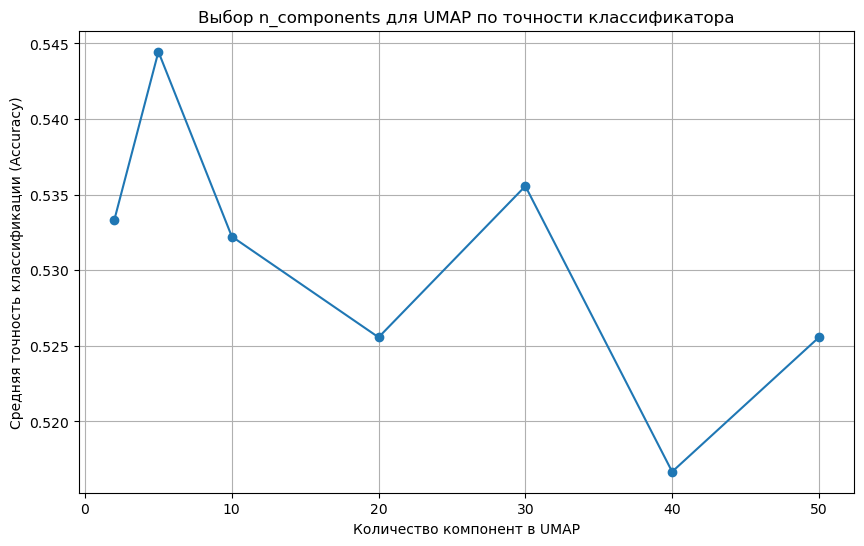

In [63]:
n_components_list = [2, 5, 10, 20, 30, 40, 50]
scores = []

# Прогоняем по разным n_components
for n in n_components_list:
    print(f"Пробуем UMAP с n_components = {n}")
    
    umap_model = UMAP(n_components=n, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    
    # Создаем пайплайн: UMAP + классификатор
    pipeline = make_pipeline(umap_model, clf)
    
    # Оцениваем точность на кросс-валидации (можно поменять на f1, ROC AUC и т.п.)
    score = cross_val_score(pipeline, X_scaled, y_encoded, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Построим график зависимости точности от числа компонент
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, scores, marker='o')
plt.xlabel('Количество компонент в UMAP')
plt.ylabel('Средняя точность классификации (Accuracy)')
plt.title('Выбор n_components для UMAP по точности классификатора')
plt.grid()
plt.show()

Пробуем UMAP с n_components = 3


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 4


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 5


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 6


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 7


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Пробуем UMAP с n_components = 8


C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


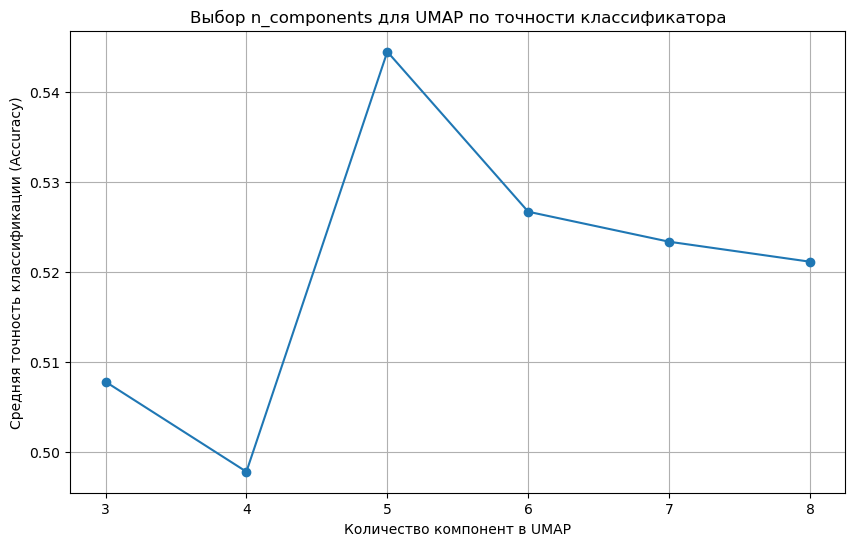

In [65]:
n_components_list = [3, 4, 5, 6, 7, 8]
scores = []

# Прогоняем по разным n_components
for n in n_components_list:
    print(f"Пробуем UMAP с n_components = {n}")
    
    umap_model = UMAP(n_components=n, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    
    # Создаем пайплайн: UMAP + классификатор
    pipeline = make_pipeline(umap_model, clf)
    
    # Оцениваем точность на кросс-валидации (можно поменять на f1, ROC AUC и т.п.)
    score = cross_val_score(pipeline, X_scaled, y_encoded, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Построим график зависимости точности от числа компонент
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, scores, marker='o')
plt.xlabel('Количество компонент в UMAP')
plt.ylabel('Средняя точность классификации (Accuracy)')
plt.title('Выбор n_components для UMAP по точности классификатора')
plt.grid()
plt.show()

In [67]:
umap = UMAP(n_components=5)  
X_train_umap = umap.fit_transform(X_train_scaled)
X_test_umap = umap.transform(X_test_scaled)

In [77]:
# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 0.5)  # Мин. число объектов для разбиения
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)  # Мин. число объектов в листе
    max_features = trial.suggest_float("max_features", 0.1, 1.0)  # Доля признаков для построения каждого дерева
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])  # Использовать бутстрап?

    # Определяем модель
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_umap, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-24 14:52:05,638] A new study created in memory with name: no-name-7b6d3a21-414c-47fe-9e29-7720d77fe203
[I 2025-04-24 14:52:12,826] Trial 2 finished with value: 0.5215686274509803 and parameters: {'n_estimators': 81, 'max_depth': 30, 'min_samples_split': 0.35064463124226325, 'min_samples_leaf': 10, 'max_features': 0.8214095300717876, 'bootstrap': True}. Best is trial 2 with value: 0.5215686274509803.
[I 2025-04-24 14:52:13,192] Trial 6 finished with value: 0.5333333333333333 and parameters: {'n_estimators': 81, 'max_depth': 50, 'min_samples_split': 0.2922987202166372, 'min_samples_leaf': 7, 'max_features': 0.7088270984235626, 'bootstrap': True}. Best is trial 6 with value: 0.5333333333333333.
[I 2025-04-24 14:52:14,036] Trial 3 finished with value: 0.5333333333333332 and parameters: {'n_estimators': 493, 'max_depth': 32, 'min_samples_split': 0.4415041001279009, 'min_samples_leaf': 8, 'max_features': 0.2687391118752514, 'bootstrap': False}. Best is trial 6 with value: 0.533333

Лучшие параметры: {'n_estimators': 452, 'max_depth': 22, 'min_samples_split': 0.07012898365850484, 'min_samples_leaf': 10, 'max_features': 0.23864604825585492, 'bootstrap': True}
Лучший результат: 0.5699346405228758


In [83]:
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y)
y_test_encoded = encoder.transform(y_test)

In [91]:
# Обучаем модель
model = RandomForestClassifier(n_estimators=452, max_depth=22, min_samples_split=0.07012898365850484, min_samples_leaf=10, max_features=0.23864604825585492, bootstrap=True)
model.fit(X_train_umap, y_train)

# Оценка качества модели
y_pred_umap = model.predict(X_test_umap)
print(classification_report(y_test, y_pred_umap))

              precision    recall  f1-score   support

          Q1       0.52      0.59      0.55        41
          Q2       0.66      0.62      0.64        40
          Q3       0.55      0.64      0.59        28
          Q4       0.50      0.35      0.41        26

    accuracy                           0.56       135
   macro avg       0.56      0.55      0.55       135
weighted avg       0.56      0.56      0.56       135

